In [1]:
# std libs
import os
import sys
import glob

# always good to have
import numpy as np
import pandas as pd

# ploting libs
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import tadpose

### Basic definitions

In [3]:
# main input required. SLEAP naysis file is expected to be in same folder with ending ".predictions.analysis.h5"
video_fn = "B:/fs3-bifexchgrp/BIF_StaffSci/Christoph/sweengrp/tadpose_examples/Tad1_Take1_oursNOGFP_st59.mp4"

In [7]:
# create tad object
tad = tadpose.Tadpole.from_sleap(video_fn)

In [10]:
# create aligner by giving to part names and their correpsonding alignment location
aligner = tadpose.alignment.TadpoleAligner(
    {"tail1": np.array([0, 0.0]), "heart": np.array([0, 1.0])}, scale=False
)

# assign alinger to tad
tad.aligner = aligner

In [18]:
# list of body part names
print("Bodyparts")
bodyparts = tad.bodyparts
for bp in bodyparts:
    print(f" - {bp}")
print()

# bodypart locations in Frames x bodyparts x 2
print("Raw locations")
locs = tad.locs()
print(locs.shape, " = Frames x bodyparts x 2", "\n")

# to get locations use:
print("Single raw locations")
heart_loc = tad.locs(parts=("heart",))
print(heart_loc.shape, "\n")

print("Get all ego-centric locations")
ego_locs = tad.ego_locs(track_idx=0, fill_missing=False)
print(ego_locs.shape, "\n")


print("Get ego-centric selected locations")
ego_locs_left_leg = tad.ego_locs(
    track_idx=0, parts=("hindlimbL", "ankleL", "kneeL"), fill_missing=True
)
print(ego_locs_left_leg.shape, "\n")

Bodyparts
 - eyeR
 - eyeL
 - heart
 - forelimbR
 - forelimbL
 - hindlimbL
 - ankleL
 - kneeL
 - kneeR
 - ankleR
 - hindlimbR
 - tail1
 - tail2
 - tail3
 - tail4
 - tail5
 - tailtip

Raw locations
(11447, 17, 2)  = Frames x bodyparts x 2 

Single raw locations
(11447, 1, 2) 

Get all ego-centric locations


C:\Users\csommer\anaconda3\envs\DLC-GPU\lib\site-packages\numpy\linalg\linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(11447, 17, 2) 

Get ego-centric selected locations
(11447, 3, 2) 



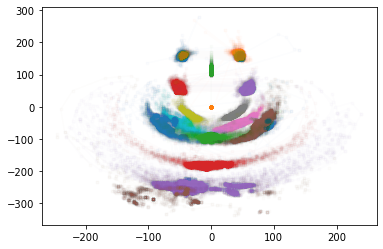

In [19]:
# plot aligned locations for all bodyparts
f, ax = plt.subplots()
for pi, p in enumerate(tad.bodyparts):
    ax.plot(*ego_locs[:, pi].T, marker=".", alpha=0.01)

### Extract features

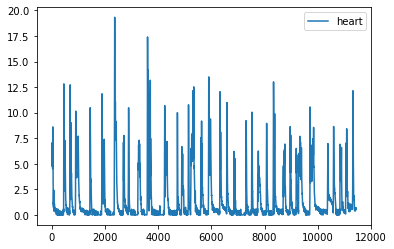

In [13]:
# get heart speed (not ego-centric)
heart_speed_df = tadpose.analysis.speeds(tad, parts=("heart",))

# plot it
heart_speed_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B43A00BC48>]],
      dtype=object)

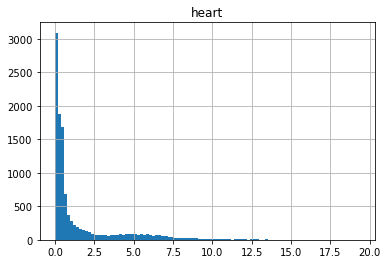

In [14]:
# plot heart speed distribution / useful for finding threshold
heart_speed_df.hist(bins=100)

In [15]:
# get ego-centric speed for some parts
parts_speed = [
    "forelimbR",
    "forelimbL",
    "hindlimbL",
    "hindlimbR",
    "tail1",
    "tail2",
    "tail3",
    "tailtip",
]

speeds = tadpose.analysis.speeds(tad, parts_speed)

h:\projects\068_lora_tadpole\tadpose\tadpose\utils.py:67: UserWarning: WARNING: all locations of a bodypart are None. Cannot fill missing.... skipping
  "WARNING: all locations of a bodypart are None. Cannot fill missing.... skipping"


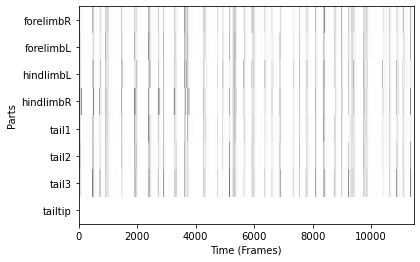

In [16]:
# plot them as heatmap
f, ax = plt.subplots()
im = ax.imshow(
    speeds.T,
    aspect="auto",
    interpolation="nearest",
    cmap="gray_r",
)
ax.set_xlabel("Time (Frames)")
ax.set_ylabel("Parts")
ax.set_yticks(np.arange(len(parts_speed)))
ax.set_yticklabels(parts_speed);

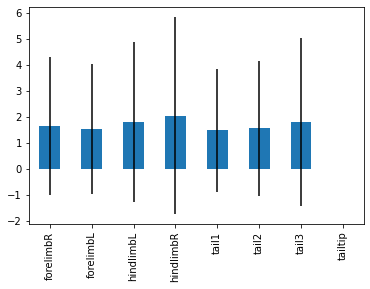

In [17]:
# plot them mean/std bar plot
speeds.mean().plot.bar(yerr=speeds.std())